In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SELLER P&L ANALYSIS

The goal of this exercise is to compute, for each `seller_id`:

- The **revenue** it brings (10% of each sales + 80 BRL per month)
- The **cost** associated with all its bad reviews (1-star = 100 BRL, 2-star = 50, 3-star=40)
- The resulting **profit** made by Olist for each seller

❓ Let's not start all again from scratch! Import your seller training set and investigate what you already have.


In [26]:
from olist.seller import Seller
sellers = Seller().get_training_data()
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,months_on_olist,revenue,profits_before_it_costs
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,1.514329,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,140,3,3,1.000,218.70,4.0,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.155190,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,15.0,2370.307,2130.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.00,0,1,1,1.000,158.00,1.0,95.800,95.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.00,0,1,1,1.000,79.99,1.0,87.999,87.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.00,100,1,1,1.000,167.99,1.0,96.799,-3.201


❓ What is missing? Write down a strategy to get your missing columns, by re-using as much of  what has already been coded in `seller.py` as possible

In [46]:
# REVENUE

# Monthly subscription
# (Date of last sale - date of first sale) * 80
number_of_months_on_olist = (sellers.date_last_sale - sellers.date_first_sale) / np.timedelta64(1, 'M')
sellers['months_on_olist'] = number_of_months_on_olist.map(lambda x: 1 if x < 1 else np.ceil(x))

sellers['revenue'] = sellers.months_on_olist * 80 + sellers.sales * 0.1

# COST
# Create a new column cost_of_reviews that gives the cost associated with all the bad reviews received by each seller
sellers['cost_of_review'] = sellers.review_score.map({ 1: 100, 2: 50, 3: 40, 4: 0, 5: 0})
sellers['cost_of_reviews'] = sellers.groupby('seller_id', as_index=False).sum().cost_of_review

❓ Update `seller.py` accordingly

We updated the `get_review_score` method with this:

```python
reviews_df['cost_of_review'] = reviews_df.review_score.map({ 1: 100, 2: 50, 3: 40, 4: 0, 5: 0})
        
reviews_df = reviews_df.groupby(
    'seller_id', as_index=False).agg({
                                      'dim_is_one_star': 'mean',
                                      'dim_is_five_star': 'mean',
                                      'review_score': 'mean',
                                      'cost_of_review': 'sum'
                                     })
# Rename columns
reviews_df.columns = ['seller_id', 'share_of_one_stars',
                      'share_of_five_stars', 'review_score', 'cost_of_reviews']
```

❓ Compute seller profits

We updated the `get_training_data method` with this:

```python
number_of_months_on_olist = (training_set.date_last_sale - training_set.date_first_sale) / np.timedelta64(1, 'M')
training_set['months_on_olist'] = number_of_months_on_olist.map(lambda x: 1 if x < 1 else np.ceil(x))

training_set['revenue'] = training_set.months_on_olist * 80 + training_set.sales * 0.1
training_set['profits_before_it_costs'] = training_set.revenue - training_set.cost_of_reviews
```

❓ Sort sellers by profit, and analyse their profitability: conclude on a possible strategy for Olist!

In [47]:
sellers.head(10)

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,months_on_olist,revenue,profits_before_it_costs,cost_of_review
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,1.514329,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.000000,0.0,3,3,1.000000,218.70,4.0,341.870,201.870,40.0
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.155190,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.550000,0.0,40,41,1.025000,11703.07,15.0,2370.307,2130.307,NaN
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.000000,0.0,1,1,1.000000,158.00,1.0,95.800,95.800,0.0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.000000,0.0,1,1,1.000000,79.99,1.0,87.999,87.999,0.0
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.000000,0.0,1,1,1.000000,167.99,1.0,96.799,-3.201,100.0
5,c240c4061717ac1806ae6ee72be3533b,rio de janeiro,RJ,0.000000,6.056956,2018-05-08 17:55:23,2018-05-08 17:55:23,0.000000,0.000000,4.000000,0.0,1,1,1.000000,59.90,1.0,85.990,85.990,0.0
6,e49c26c3edfa46d227d5121a6b6e4d37,brejao,PE,0.000000,11.653801,2017-02-04 19:31:42,2018-07-25 14:30:27,0.057143,0.742857,4.457143,0.0,35,36,1.028571,3654.25,18.0,1805.425,1475.425,NaN
7,1b938a7ec6ac5061a66a3766e0e75f90,penapolis,SP,0.000000,11.376438,2017-09-23 17:24:32,2018-08-18 19:09:29,0.100000,0.600000,4.300000,0.0,30,33,1.100000,3987.60,11.0,1278.760,978.760,NaN
8,768a86e36ad6aae3d03ee3c6433d61df,sao paulo,SP,0.077230,5.081859,2018-06-19 12:18:24,2018-08-24 03:15:18,0.000000,0.705882,4.647059,0.0,17,17,1.000000,587.46,3.0,298.746,258.746,NaN
9,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,PR,0.049730,15.853247,2017-01-07 14:00:13,2018-08-21 21:05:16,0.085561,0.652406,4.288770,0.0,187,192,1.026738,74004.62,20.0,9000.462,6780.462,NaN


(-5000.0, 5000.0)

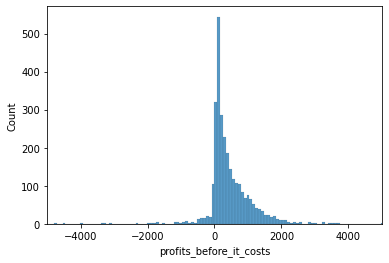

In [30]:
ax = sns.histplot(sellers.profits_before_it_costs)
ax.set_xlim(xmin=-5000, xmax=5000)

<AxesSubplot:>

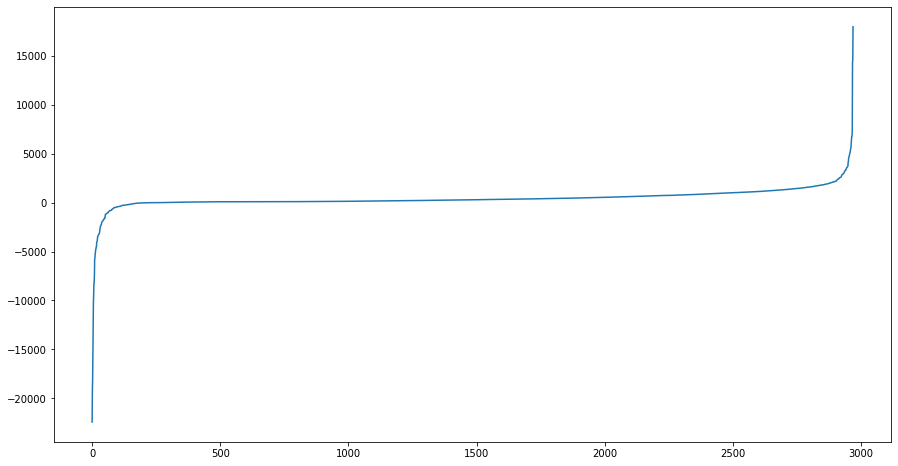

In [43]:
sellers.sort_values('profits_before_it_costs', ignore_index=True).profits_before_it_costs.plot(figsize=(15,8))

## Next steps

### 🏢 How to find the optimal seller cut-off?

1. Sort sellers by profit (worse to best performance)
2. Use a cumulative sum to see how the profits evolve as we add each seller
3. Calculate the total profits of Olist. How would you obtain the updated profits per number of sellers removed?

### 💾 How to calculate the IT costs?

The problem is that for each seller that we remove from the marketplace, we are removing orders from the platform => this decreases the overall IT costs, but increases the IT cost **per order**, which in turn affects the profit margin of Olist.

We should also calculate the IT costs **per number of sellers removed**.

1. Calculate the proportionality coefficient
2. Do a similar analysis as above on the `n_orders` to be able to calculate the IT costs per removed sellers

*Regarding the processed orders, use `n_orders` which corresponds to all orders, whether they are delivered or not since it makes no difference from an IT perspective.*